In [11]:
import numpy as np
import matplotlib.pyplot as plt
import usphere_utils as uu

h_3 14361
Sterile evs for h_3 14361.0
p_33 172916.942452366
Sterile evs for p_33 186.80475325293457
s_35 47637.4947014537
Sterile evs for s_35 141.0943979454896
ru_106 3669
Sterile evs for ru_106 503.26619633804296


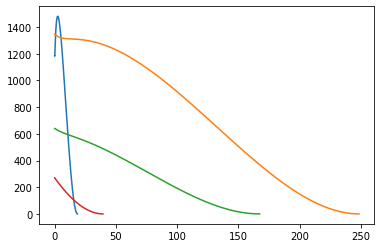

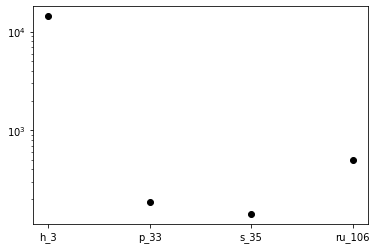

In [19]:
iso_list = ['h_3','p_33','s_35', 'ru_106']

livetime = 365 ## 1 year
sphere_rad = 25e-9 ## fixed, although might need to change later
num_spheres = 1
trig_prob = 1
mnu = 0
loading_frac = 1e-2

m_sph = 4/3 * np.pi * sphere_rad**3 * uu.rho

plt.figure()
tot_num = []
for iso in iso_list:

    iso_dat = np.loadtxt("/Users/dcmoore/grace/impulse/steriles/data_files/%s.txt"%iso, delimiter=',', skiprows=3)
    Q, t12, A, Z = iso_dat[0, :]
    curr_Q = Q

    n_nuclei = m_sph * uu.N_A/A * loading_frac * num_spheres

    if(livetime < t12):
        n_decays = int(trig_prob * n_nuclei * (1 - 0.5**(livetime/t12) ))
    else:
        ## assume the sphere is reloaded once per half-life
        niters = np.floor(livetime/t12)
        livetime_remain = livetime % t12
        #print("Working on %d halflives and %f days remaining"%(niters, livetime_remain))
        n_decays = niters * 0.5*n_nuclei + int(trig_prob * n_nuclei * (1 - 0.5**(livetime_remain/t12) ))

    print(iso, n_decays)

    elec_e_vals = np.linspace(0.01,curr_Q,1000)

    curr_spec = uu.simple_beta(elec_e_vals, curr_Q, mnu, A, Z)
    norm_fac = n_decays/np.trapz(curr_spec, elec_e_vals)

    plt.plot( elec_e_vals, norm_fac * curr_spec )

    ## find total number of events within 7 keV of endpoint
    gpts = elec_e_vals > curr_Q - 20
    sterile_evs = np.trapz(norm_fac * curr_spec[gpts], elec_e_vals[gpts])
    tot_num.append(sterile_evs)
    print("Sterile evs for %s"%iso, sterile_evs)

plt.figure()
plt.semilogy(tot_num, 'ko')
plt.gca().set_xticks(range(len(iso_list)))
plt.gca().set_xticklabels(iso_list)

plt.show()